In [4]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file


In [5]:
!curl -O https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students=pd.read_csv('grades.csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   322  100   322    0     0    763      0 --:--:-- --:--:-- --:--:--   764


In [6]:

df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


# Move any data with missing data

In [7]:
df_students=df_students.dropna(axis=0,how='any')

In [8]:
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


# Calculate Who passed ,assuming '60' is the grade needed to pass

In [9]:
passes= pd.Series(df_students['Grade']>60)

# save who passed to the dataframe

In [10]:
df_students=pd.concat([df_students,passes.rename("Pass")],axis=1)

In [11]:
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


# Create a function that we can re-use

# Get statistics

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\dell\AppData\Local\Temp\ipykernel_8088\3264735452.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


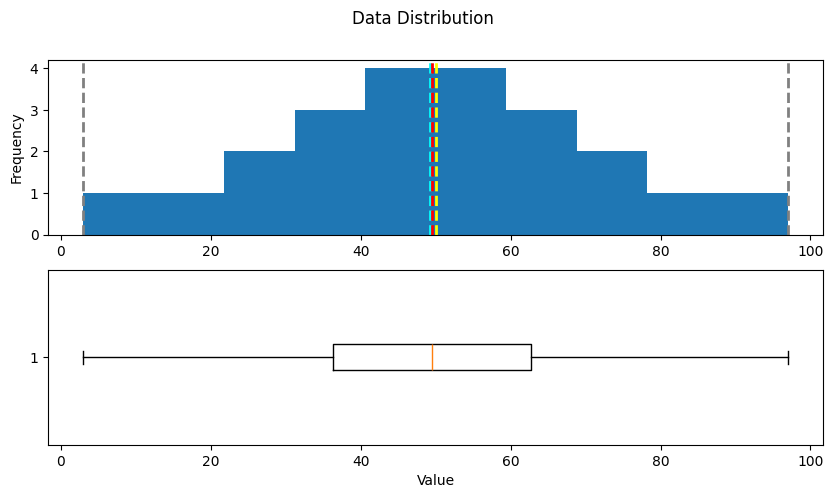

In [12]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
# Create a figure for 2 subplots (2 rows, 1 column)
    fig,ax=plt.subplots(2,1,figsize=(10,5))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()                                                                                 
show_distribution(df_students['Grade'])

# Examine the distribution of the study hours

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\dell\AppData\Local\Temp\ipykernel_8088\3264735452.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


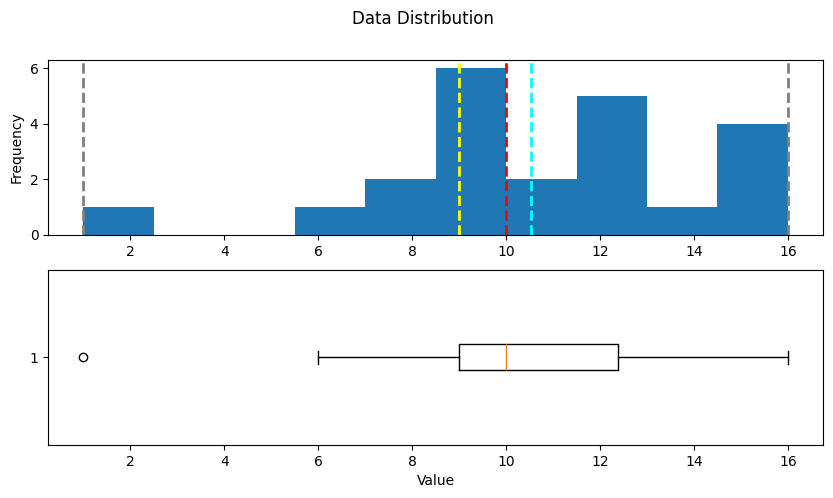

In [13]:
col=df_students['StudyHours']
show_distribution(col)

 # Look at the distribution without the outlier

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\dell\AppData\Local\Temp\ipykernel_8088\3264735452.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


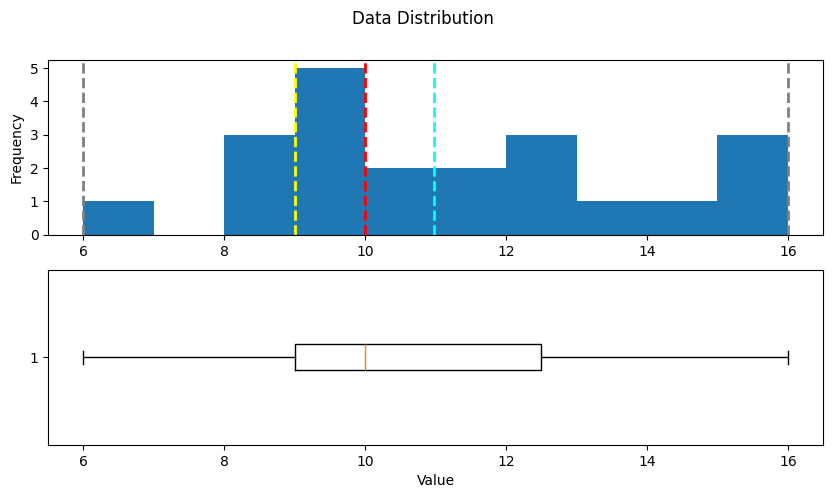

In [14]:
# Get the variable to examine 
# We will only get students who have studied more than one hour
col=df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

# Use the Panda quantile function to exclude observations below the 0.01th percentile


Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\dell\AppData\Local\Temp\ipykernel_8088\3264735452.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


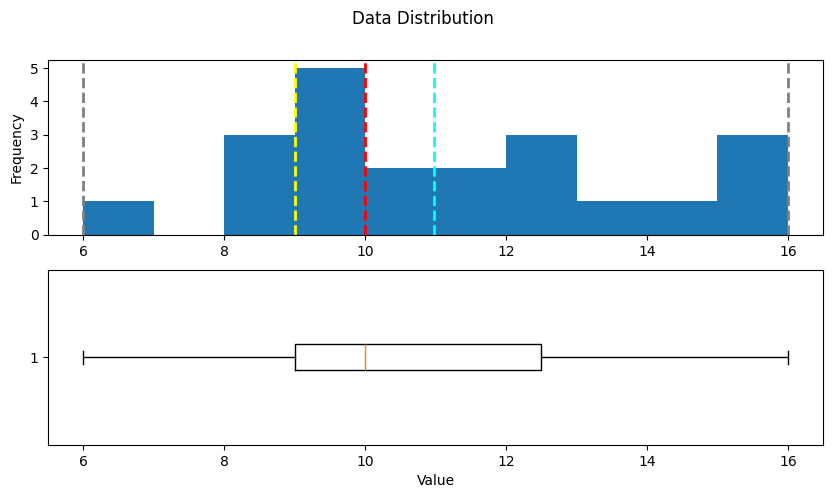

In [15]:
q01=df_students.StudyHours.quantile(0.01)
col=df_students[df_students.StudyHours>q01]['StudyHours']
show_distribution(col)

# Examine the density of the distribution

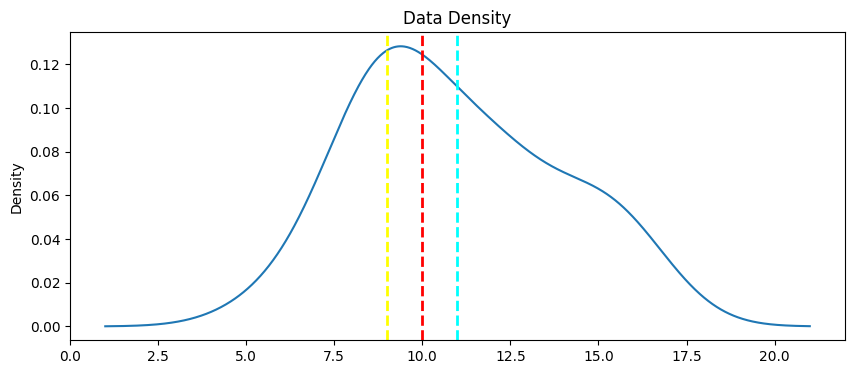

In [20]:

def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()


# Get the density of StudyHours 
show_density(col)

In [19]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


# Measure of variance

In [21]:
for col_name in ['Grade','StudyHours']:
    col=df_students[col_name]
    rng=col.max()-col.min()
    var=col.var()
    std=col.std()
    print('n{}:\n -Range:{:.2f}\n - Variance {:.2f}\n -Std.Dev: {:.2f}'.format(col_name, rng, var, std))
    

nGrade:
 -Range:94.00
 - Variance 472.54
 -Std.Dev: 21.74
nStudyHours:
 -Range:15.00
 - Variance 12.16
 -Std.Dev: 3.49


# See the relationship between standard deviation and data in the normal distribution

In [1]:
import scipy.stats as stats
# Get the Grade column
col=df_students['Grade']
# get the density 
density = stats.gaussian_kde(col)

#plot the density
col.plot.density()

#Get the mean and standard deviation
s=col.std()
m=col.mean()

#Annotate 1 stdev
x1=[m-s,m+s]
y1=density(x1)
plt.plot(x1,y1,color="magenta")
plt.annotate('1 std(68.26%)',(x1[1],y1[1]))

#Annotate 2 stdev
x2=[m-2s,m+2s]
y2=density(x2)
plt.plot(x2,y2,color="green")
plt.annotate('2 std(95.45%)',(x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

#show the location of the mean
plt.axvline(col.mean(),color='cyan',linestyle='dashed',linewidth=2)
plt.axis('off')
plt.show()


SyntaxError: invalid decimal literal (1249850444.py, line 21)